In [1]:
"""
=========================================================
GridSearch with ESNRegressor 
=========================================================
This example shows a minimal example of Echo State Network
applied to a regression problem using a Grid Search 
cross-validation directly from scikit-learn.
"""
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit

from echoes import ESNRegressor
from echoes.plotting import plot_predicted_ts

# Prepare synthetic data 
x = np.linspace(0, 30*np.pi, 1000).reshape(-1,1)
inputs = np.sin(x) + np.random.normal(scale=.2, size=x.shape)
outputs = np.cos(x) + np.random.normal(scale=.2, size=x.shape)
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=.3, shuffle=False)

grid = GridSearchCV(
    estimator=ESNRegressor(n_transient=100),
    param_grid={
        "n_reservoir": [20, 50, 100, 150],
        "leak_rate": [0.2, 0.4, 0.8],
        "spectral_radius": [0.85, 0.9, 0.95],
    },
    cv=TimeSeriesSplit() # generate time-aware splits
)
grid.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=ESNRegressor(n_transient=100),
             param_grid={'leak_rate': [0.2, 0.4, 0.8],
                         'n_reservoir': [20, 50, 100, 150],
                         'spectral_radius': [0.85, 0.9, 0.95]})

training r2 score:  0.8970488636806692
test r2 score:  0.8485988057232583


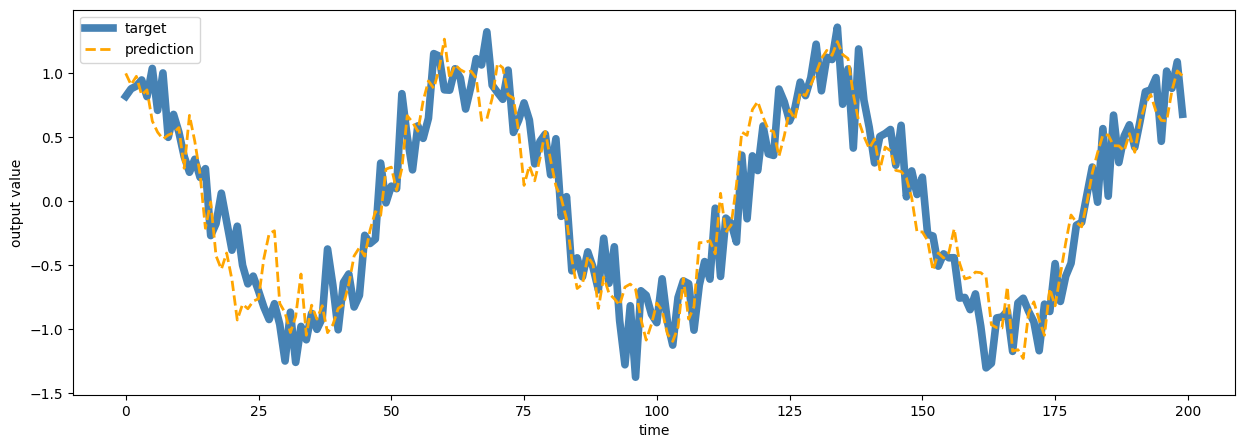

In [2]:
esn = grid.best_estimator_
print("training r2 score: ", esn.score(X_train, y_train))
print("test r2 score: ", esn.score(X_test, y_test))
# Get prediction for plotting
y_pred = esn.predict(X_test)
plot_predicted_ts(y_test, y_pred, figsize=(15, 5), start=100);